# Sales Analysis

# Import necessary libraries

In [6]:
import os
import pandas as pd

# Merge data from each month into one CSV

In [14]:
path = r"C:\Users\nikol\Downloads\sales_analysis"
files = [file for file in os.listdir(path) if not file.startswith('.')] 

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

# Read in updated dataframe

In [856]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# Drop rows of NAN

In [874]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


# Drop duplicates

In [18]:
all_data.drop_duplicates(inplace=True)


# Drop columns wich contain 'Or'

In [872]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

# Make columns correct type

In [331]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Add month column

In [876]:
all_data['Month '] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()


C:\Users\nikol\AppData\Local\Temp\ipykernel_16812\811840978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month '] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,4


# Add city column

In [ ]:
all_data['Month '] = pd.to_datetime(all_data['Order Date']).dt.month

split_address_1 = all_data['Purchase Address'].str.split(',',expand=True)[1]
split_address_2 = all_data['Purchase Address'].str.split(',',expand=True)[2].str[0:3]

all_data['City']=(split_address_1+split_address_2)

all_data

In [169]:
#all_data.drop(['City'],axis=1,inplace=True)
all_data = all_data.rename(columns={'new':'City'})
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


## Data Exploration!

# Question 1: What was the best month for sales? How much was earned that month? 

# CALCULATING SALES

In [882]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data

C:\Users\nikol\AppData\Local\Temp\ipykernel_16812\2713537240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA,4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,9,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,9,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco CA,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco CA,9,379.99


In [901]:
import matplotlib.pyplot as plt
Month_Sales = all_data.groupby(['Month'])['Sales'].sum().sort_values(ascending=False)
Month_Sales


Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

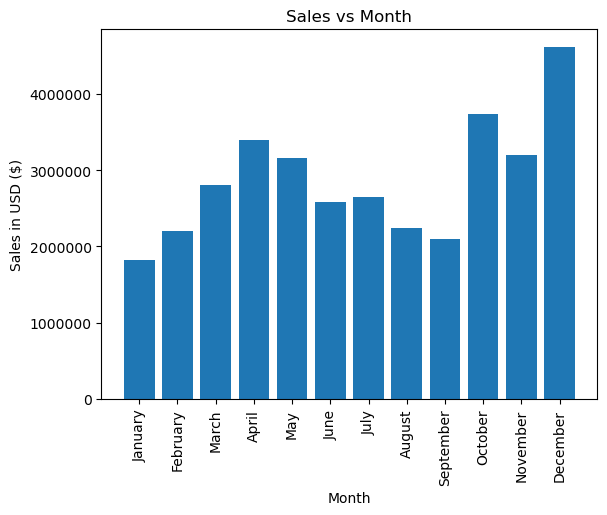

In [906]:
import matplotlib.pyplot as plt
Month_Sales = all_data.groupby(['Month'])['Sales'].sum()

plt.bar(Month_Sales.index,Month_Sales.values)
plt.xlabel('Month')
plt.xticks(Month_Sales.index, ['January', 'February', 'March','April','May','June','July','August','September',
'October','November','December'],rotation='vertical')
plt.xticks(Month_Sales.index)
plt.ylabel('Sales in USD ($)')
plt.title('Sales vs Month')
plt.ticklabel_format(style='plain', axis='y')


# MONTH VS SALES CONSIDERING EACH CITY - IN THIS EXAMPLE ATLANTA WAS TAKEN AS OBJECT

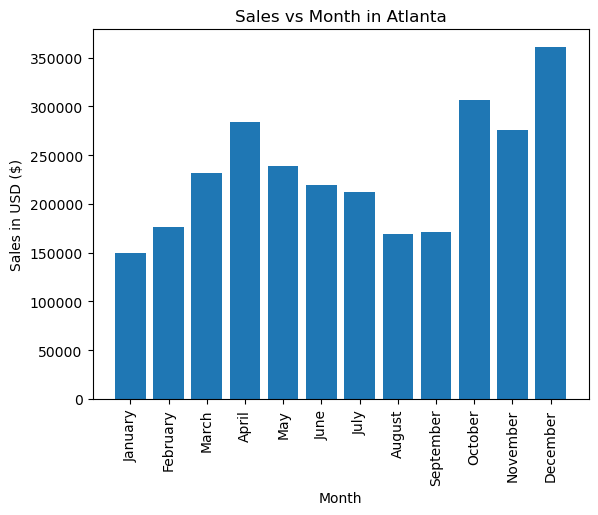

In [907]:
import matplotlib.pyplot as plt
Month_Sales = all_data.groupby(['City','Month'])['Sales'].sum().reset_index()
Month_Sales_filtered=Month_Sales[Month_Sales['City'].str.contains('Atlanta',case=False)]

plt.bar(Month_Sales_filtered['Month'], Month_Sales_filtered['Sales'])
plt.xlabel('Month')
plt.xticks(Month_Sales_filtered['Month'], ['January', 'February', 'March','April','May','June','July','August','September',
'October','November','December'],rotation='vertical')
plt.xticks(Month_Sales_filtered['Month'])
plt.ylabel('Sales in USD ($)')
plt.title('Sales vs Month in Atlanta')
plt.ticklabel_format(style='plain', axis='y')



# Question 2: What city sold the most product?

In [735]:
City_Sales = all_data.groupby(['City'])['Sales'].sum().sort_values(ascending=False)
City_Sales



City
 San Francisco CA    8254743.55
 Los Angeles CA      5448304.28
 New York City NY    4661867.14
 Boston MA           3658627.65
 Atlanta GA          2794199.07
 Dallas TX           2765373.96
 Seattle WA          2745046.02
 Portland OR         1870010.56
 Austin TX           1818044.33
 Portland ME          449321.38
Name: Sales, dtype: float64

Text(0.5, 1.0, 'City vs Sales')

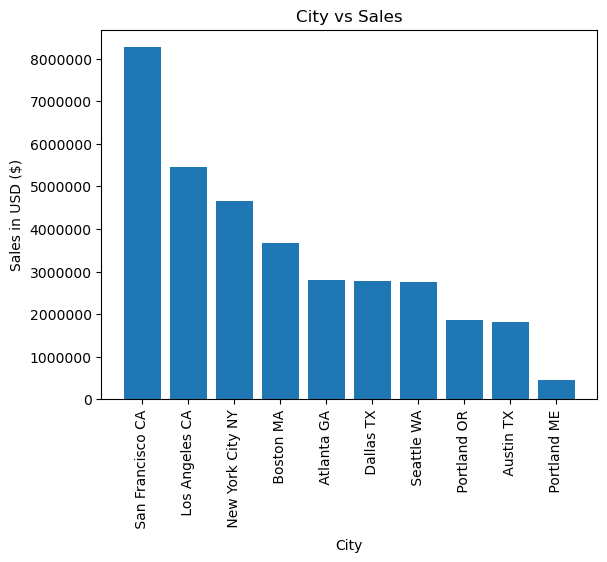

In [908]:
import matplotlib.pyplot as plt
City_Sales = all_data.groupby(['City'])['Sales'].sum().sort_values(ascending=False)
plt.bar(City_Sales.index,City_Sales.values)
plt.xlabel('City')
plt.xticks(City_Sales.index,rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('City vs Sales')




# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [246]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


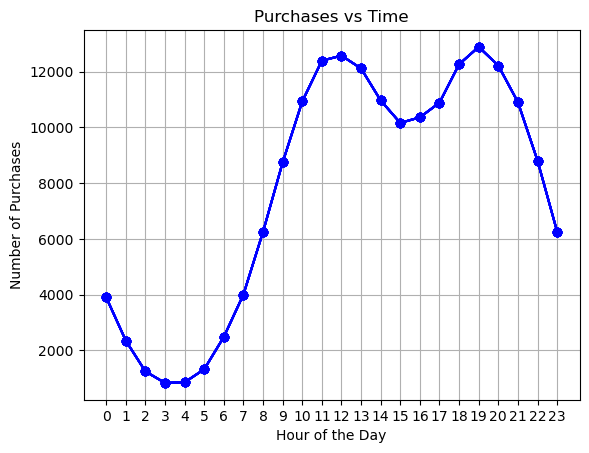

In [719]:
sales_peak = all_data.groupby(['Hour']).count()
plt.plot(sales_peak.index, sales_peak.values, marker='o',color='b')
plt.title('Purchases vs Time')
plt.ylabel("Number of Purchases")
plt.xticks(sales_peak.index)
plt.xlabel("Hour of the Day")
plt.grid()
plt.show()

# Question 4: What products are most often sold together?

In [601]:
all_data.set_index('Order ID', inplace=True)
all_data.loc[all_data.index.value_counts()>=2]

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17
...,...,...,...,...,...,...,...,...,...
259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20
259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0
259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0


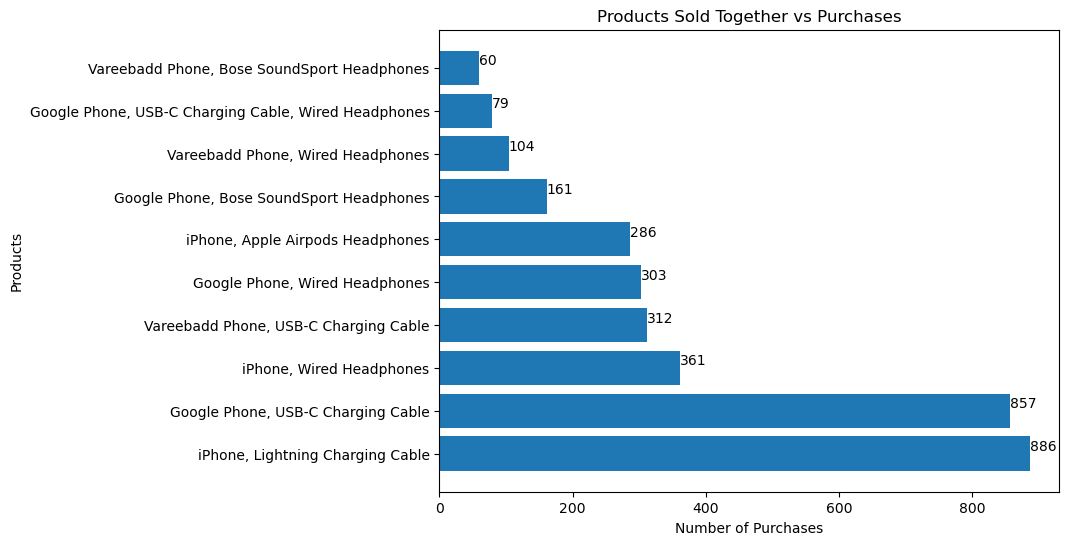

In [718]:
import matplotlib.pyplot as plt


nikolas=all_data.loc[all_data.index.value_counts()>=2]
result = nikolas.groupby('Order ID')['Product'].apply(lambda x: ', '.join(x)).reset_index()
a=result['Product'].value_counts().head(10)



plt.figure(figsize=(8, 6))
plt.barh(a.index,a.values)
plt.title('Products Sold Together vs Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Products')
for i in (range(0,10)):
    plt.text(a.values[i],i,a.values[i],ha="left",va="bottom")


# Question 5: What products are most often sold and their prices?

C:\Users\nikol\AppData\Local\Temp\ipykernel_16812\1728296274.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\nikol\AppData\Local\Temp\ipykernel_16812\1728296274.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


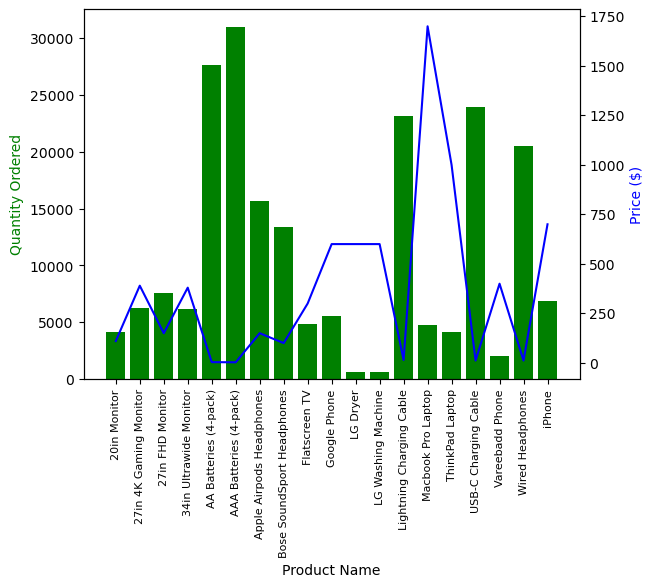

In [796]:
prices = all_data.groupby(['Product'])['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()